In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
%config Completer.use_jedi = False


In [36]:
# The Full Image to Search
full = cv2.imread('../DATA/sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)


# The Template to Match
face= cv2.imread('../DATA/sammy_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)


# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [37]:
full_copy=full

In [ ]:
#for method in methods:
    method_eval=eval(method)
    res=cv2.matchTemplate(full,face,method_eval)
    mini,maxi,min_loc,max_loc=cv2.minMaxLoc(res)

In [8]:
method='cv2.TM_CCOEFF'

In [9]:
method_eval=eval(method)
res=cv2.matchTemplate(full,face,method_eval)
mini,maxi,min_loc,max_loc=cv2.minMaxLoc(res)

In [10]:
mini

-735580608.0

In [11]:
maxi

1755388672.0

In [12]:
min_loc,max_loc

((0, 10), (231, 345))

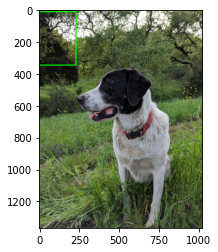

In [15]:
a=cv2.rectangle(full,min_loc,max_loc,(0,255,0),6)
plt.imshow(a)

In [16]:
height, width,channels = face.shape

In [17]:
top=max_loc
bottom=(min_loc[0]+width,min_loc[1]+height)
bottom

(486, 385)

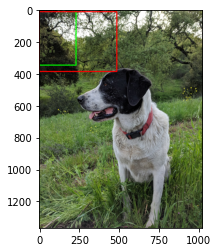

In [19]:
a=cv2.rectangle(full,min_loc,bottom,255,6)
plt.imshow(a)

In [21]:
top_left=top

In [32]:
top_left=min_loc

In [33]:
bottom_right = (top_left[0] + width, top_left[1] + height)

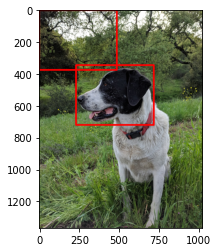

In [34]:
a=cv2.rectangle(full,top_left, bottom_right, 255, 10)
plt.imshow(a)

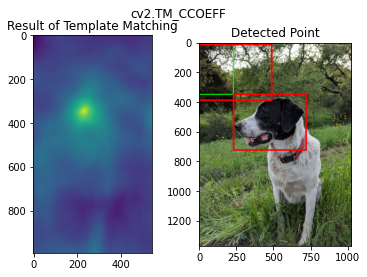

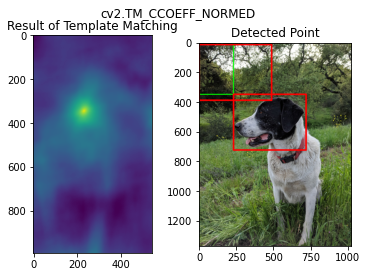

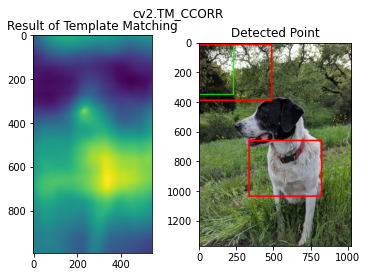

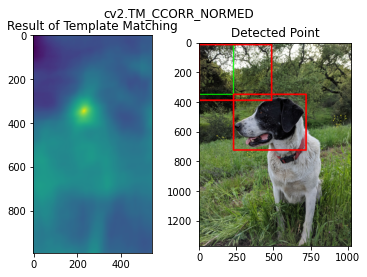

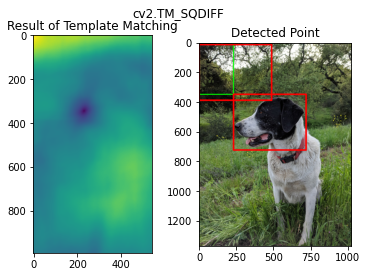

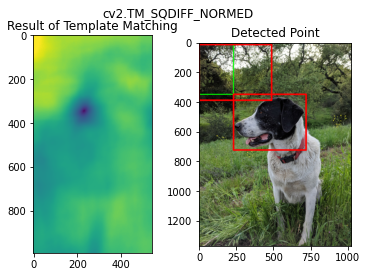

In [26]:
for m in methods:
    
    # Create a copy of the image
    full_copy = full.copy()
    
    # Get the actual function instead of the string
    method = eval(m)

    # Apply template Matching with the method
    res = cv2.matchTemplate(full_copy,face,method)
    
    # Grab the Max and Min values, plus their locations
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # Set up drawing of Rectangle
    
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    # Notice the coloring on the last 2 left hand side images.
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc    
    else:
        top_left = max_loc
        
    # Assign the Bottom Right of the rectangle
    bottom_right = (top_left[0] + width, top_left[1] + height)

    # Draw the Red Rectangle
    cv2.rectangle(full_copy,top_left, bottom_right, 255, 10)

    # Plot the Images
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Result of Template Matching')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detected Point')
    plt.suptitle(m)
    
    
    plt.show()
    print('\n')
    print('\n')
    
    

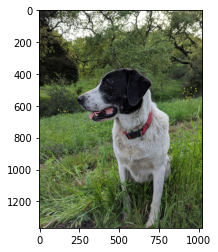

In [38]:
plt.imshow(full_copy)

In [39]:
min_loc

(231, 345)

In [40]:
max_loc

(0, 0)

In [42]:
method='cv2.TM_CCOEFF'
method_eval=eval(method)
res=cv2.matchTemplate(full,face,method_eval)
mini,maxi,min_loc,max_loc=cv2.minMaxLoc(res)

In [43]:
min_loc

(0, 10)

In [44]:
max_loc

(231, 345)

In [45]:
height,width,shape=face.shape

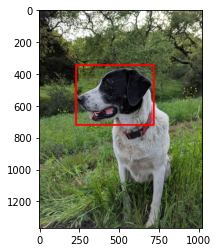

In [46]:
top=max_loc
bottom=(top[0]+width,top[1]+height)
a=cv2.rectangle(full_copy,top,bottom,255,10)
plt.imshow(a)

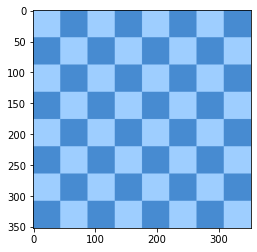

In [61]:
chess_color=cv2.imread('../DATA/flat_chessboard.png')
chess_colors=cv2.cvtColor(chess_color,cv2.COLOR_RGB2BGR)
plt.imshow(chess_color)

In [50]:
chess=np.float32(chess)

In [51]:
dst=cv2.cornerHarris(chess,2,3,0.04)
dst=cv2.dilate(dst,None)

In [58]:
chess_color[dst>1*dst.max()]=[255,0,0]
#plt.imshow(chess)

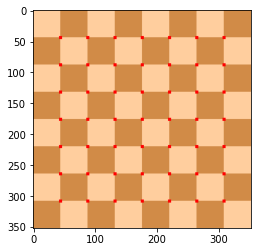

In [59]:
plt.imshow(chess_color)

In [62]:
found,corners=cv2.findChessboardCorners(chess_color,(7,7))

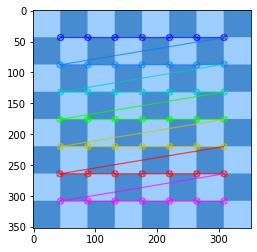

In [63]:
cv2.drawChessboardCorners(chess_color,(7,7),corners,found)
plt.imshow(chess_color)

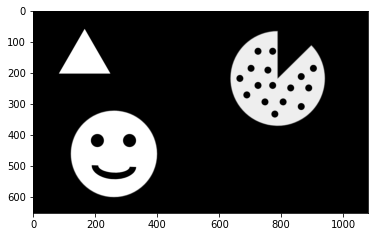

In [65]:
img = cv2.imread('../DATA/internal_external.png',0)
plt.imshow(img,cmap='gray')

In [66]:
image,countours,hierarchy=cv2.findContours(img,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [67]:
image.shape

(652, 1080)

In [70]:
len(countours)

22

In [71]:
hierarchy.shape

(1, 22, 4)

In [90]:
hierarchy[0][0][2]

1

In [74]:
hierarchy

array([[[ 4, -1,  1, -1],
        [ 2, -1, -1,  0],
        [ 3,  1, -1,  0],
        [-1,  2, -1,  0],
        [21,  0,  5, -1],
        [ 6, -1, -1,  4],
        [ 7,  5, -1,  4],
        [ 8,  6, -1,  4],
        [ 9,  7, -1,  4],
        [10,  8, -1,  4],
        [11,  9, -1,  4],
        [12, 10, -1,  4],
        [13, 11, -1,  4],
        [14, 12, -1,  4],
        [15, 13, -1,  4],
        [16, 14, -1,  4],
        [17, 15, -1,  4],
        [18, 16, -1,  4],
        [19, 17, -1,  4],
        [20, 18, -1,  4],
        [-1, 19, -1,  4],
        [-1,  4, -1, -1]]], dtype=int32)

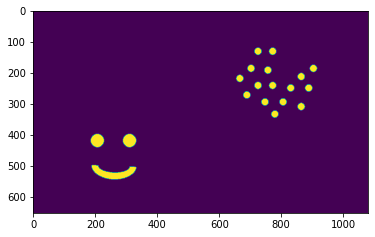

In [85]:
black=np.zeros((img.shape))
for i in range(len(countours)):
    if hierarchy[0][i][3]!=-1:
        cv2.drawContours(black,countours,i,255,-1)
plt.imshow(black)        

In [5]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [92]:
reeses = cv2.imread('../DATA/reeses_puffs.png',0)     

In [93]:
cereals = cv2.imread('../DATA/many_cereals.jpg',0) 

In [97]:
sift=cv2.xfeatures2d.SIFT_create()

In [98]:
kp1,dst1=sift.detectAndCompute(reeses,None)
kp2,dst2=sift.detectAndCompute(cereals,None)

In [102]:
#kp1

In [99]:
bf=cv2.BFMatcher()

In [100]:
matches = bf.knnMatch(dst1,dst2,k=2)

In [104]:
#matches

In [106]:
good=[]

for m1,m2 in matches:
    if m1.distance<0.75*m2.distance:
        good.append([m1])

In [107]:
len(good)

78

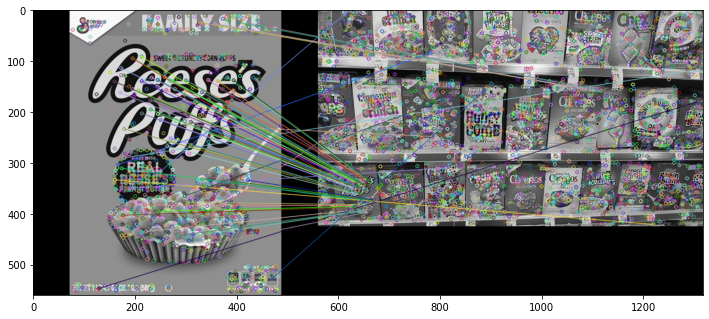

In [108]:
sift_matches=cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None)
display(sift_matches)

In [3]:
sep_coins = cv2.imread('../DATA/pennies.jpg')

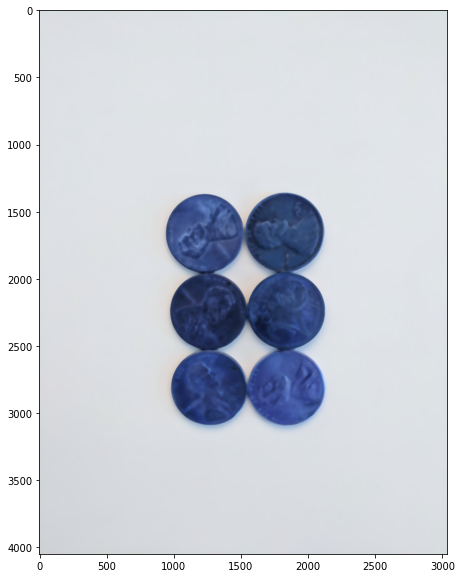

In [6]:
sep_blur=cv2.medianBlur(sep_coins,25)
display(sep_blur)

In [7]:
gray_sep_coins = cv2.cvtColor(sep_blur,cv2.COLOR_BGR2GRAY)

In [8]:
ret, sep_thresh = cv2.threshold(gray_sep_coins,160,255,cv2.THRESH_BINARY_INV)

In [9]:
s=sep_thresh

In [10]:
image,contours,hierarchy=cv2.findContours(s,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [11]:
hierarchy

array([[[-1, -1,  1, -1],
        [ 2, -1, -1,  0],
        [-1,  1, -1,  0]]], dtype=int32)

In [12]:
hierarchy[0][0][3]

-1

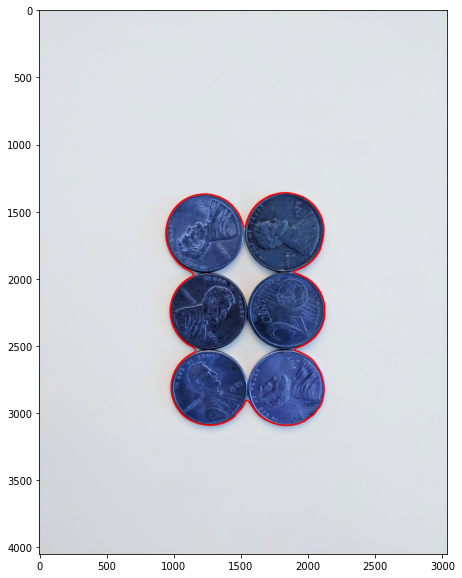

In [13]:
for i in range(len(hierarchy)):
    if hierarchy[0][i][3]==-1:
        cv2.drawContours(sep_coins,contours,i,255,10)
display(sep_coins)

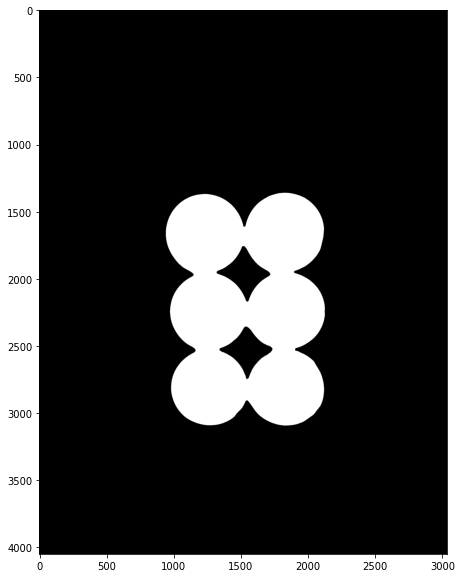

In [15]:
display(s)

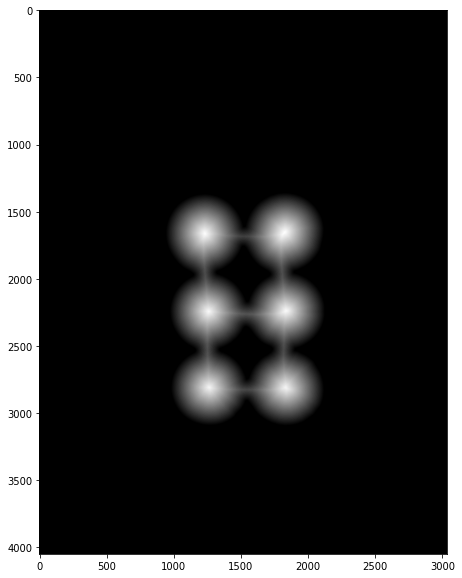

In [16]:
dist_tran=cv2.distanceTransform(s,cv2.DIST_L2,5)
display(dist_tran)

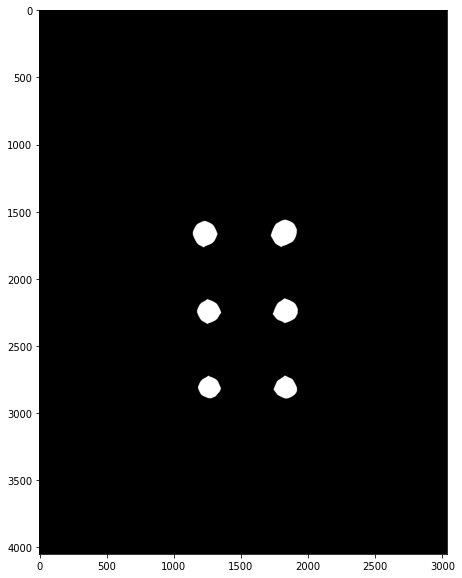

In [17]:
ret,sure_fg=cv2.threshold(dist_tran,0.7*dist_tran.max(),255,0)
display(sure_fg)

In [20]:
sure_fg=np.uint8(sure_fg)

In [22]:
sure_bg=s

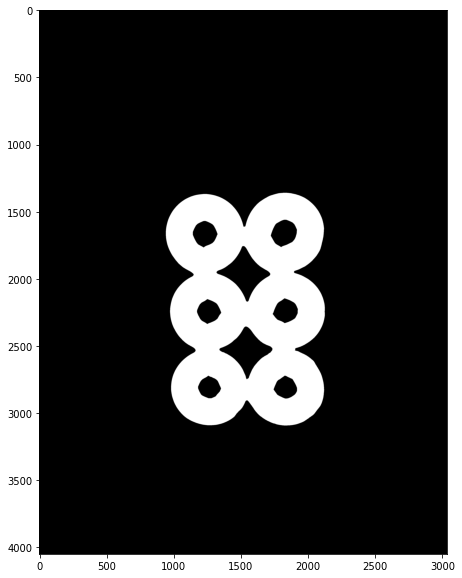

In [23]:
res=np.subtract(sure_bg,sure_fg)
display(res)

In [32]:
ret,markers=cv2.connectedComponents(sure_fg)

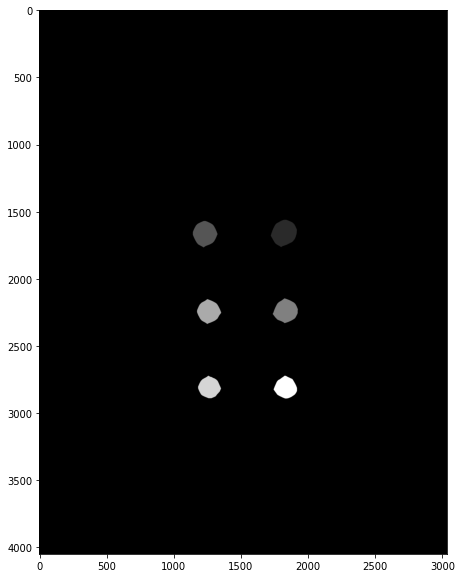

In [33]:
display(markers)

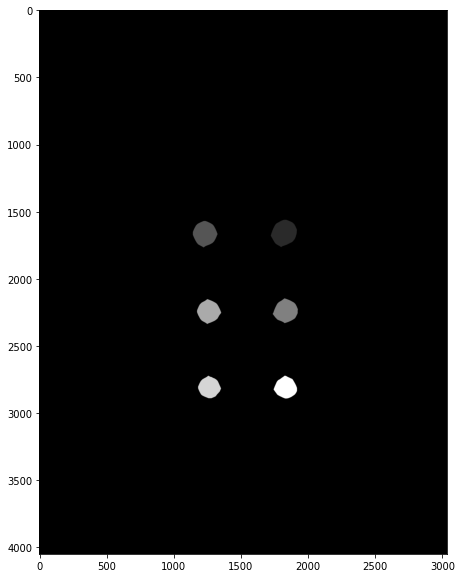

In [34]:
markers=markers+1
display(markers)

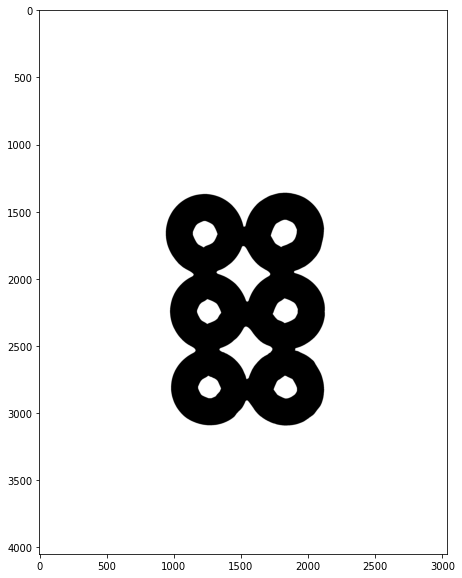

In [29]:
markers[res==255]=0
display(markers)

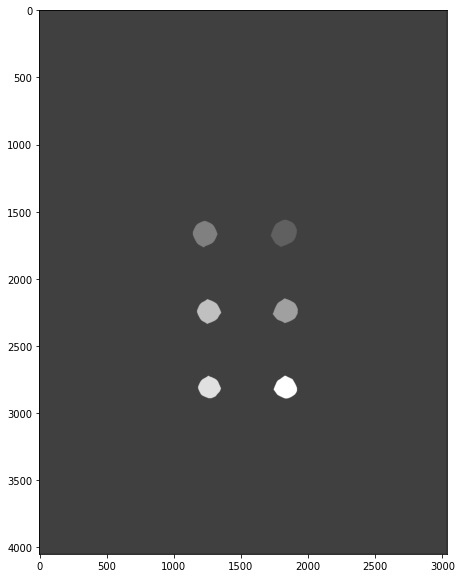

In [35]:
markers = cv2.watershed(sep_coins,markers)
display(markers)

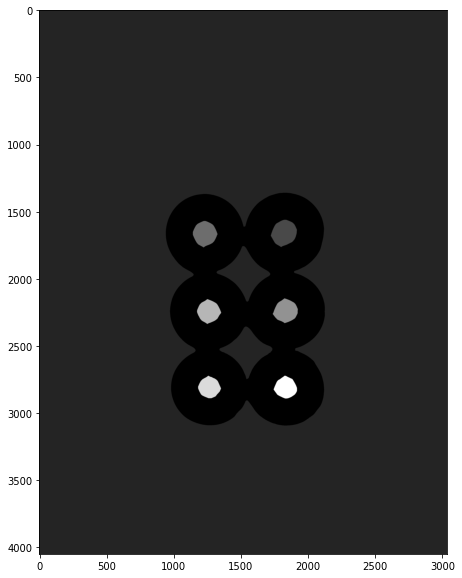

In [36]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[res==255] = 0

display(markers)

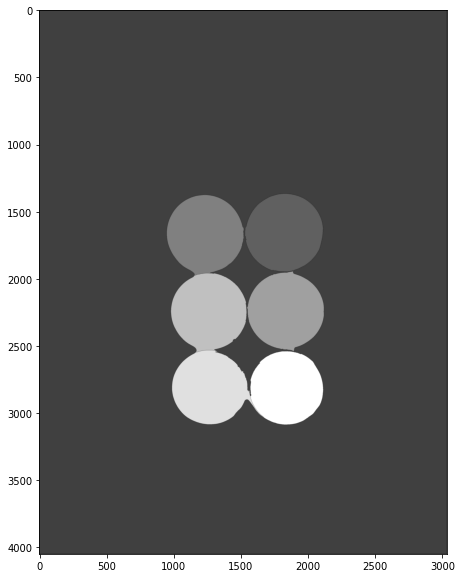

In [37]:
markers=cv2.watershed(sep_coins,markers)
display(markers)

In [38]:
image, contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

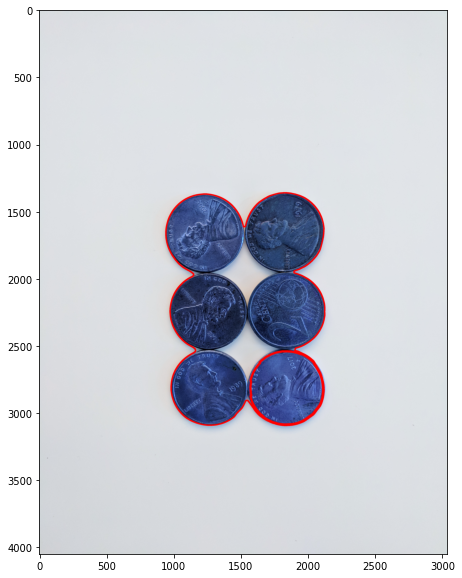

In [42]:
for i in range(len(hierarchy)):
    if hierarchy[0][i][3]==-1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),15)
display(sep_coins)

In [43]:
img = cv2.imread('../DATA/pennies.jpg')

In [44]:
img = cv2.medianBlur(img,35)

In [45]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [46]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

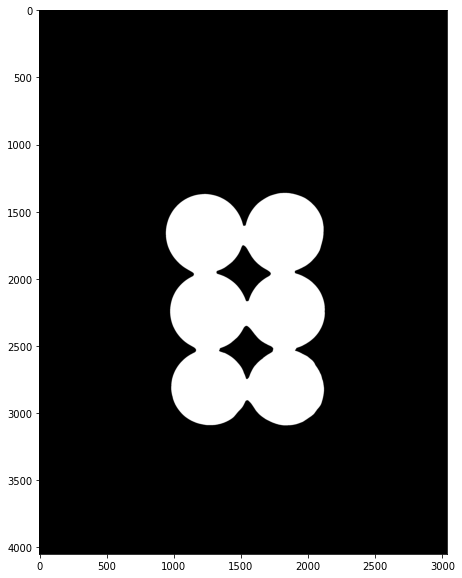

In [47]:
display(thresh,cmap='gray')

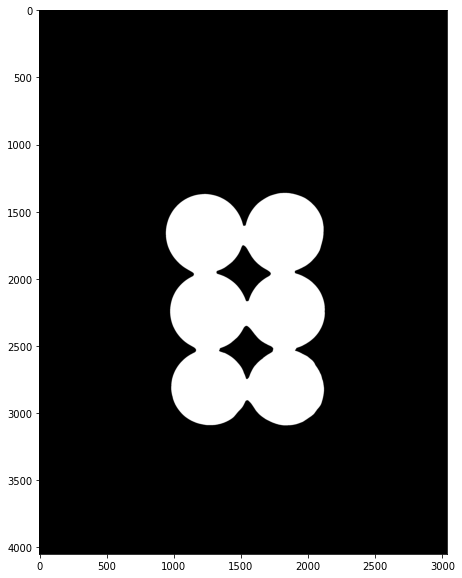

In [49]:
kernel=np.ones((3,3),np.uint8)
opening=cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)
display(opening)

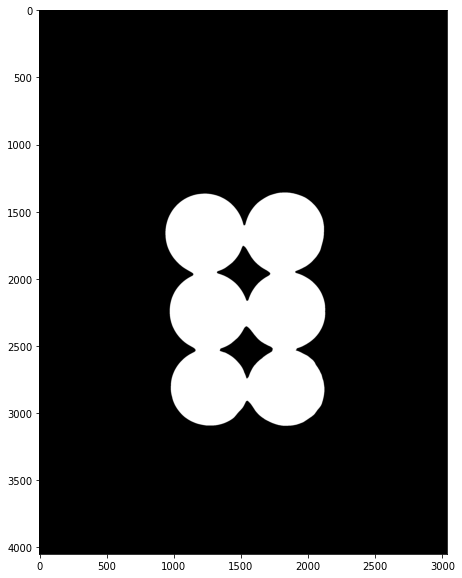

In [50]:
sure_bg=cv2.dilate(opening,kernel,iterations=3)
display(sure_bg)

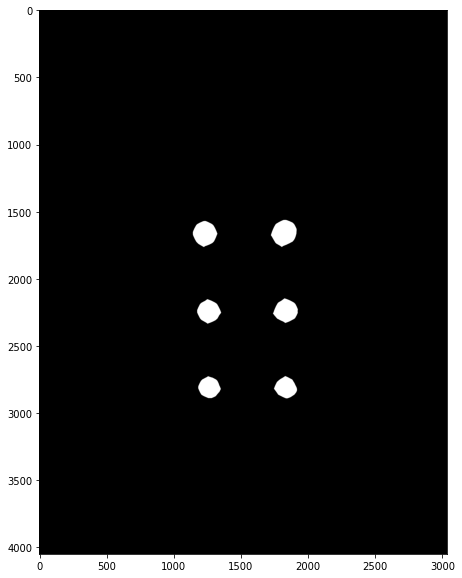

In [52]:
dist=cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist,0.7*dist.max(),255,0)
display(sure_fg)

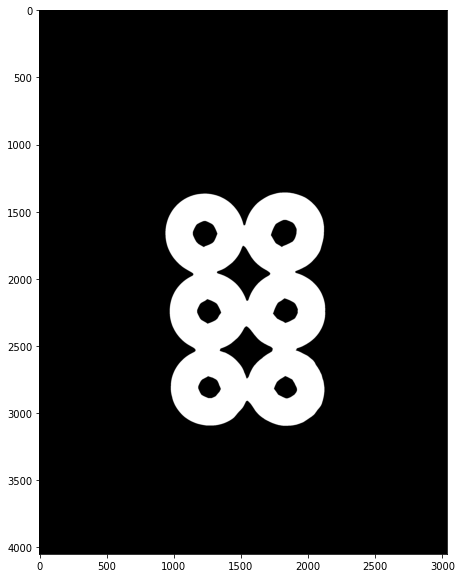

In [53]:
sure_fg=np.uint8(sure_fg)
unknown=np.subtract(sure_bg,sure_fg)
display(unknown)

In [54]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [55]:
markers = cv2.watershed(img,markers)


In [56]:
image, contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# For every entry in contours
for i in range(len(contours)):
    
    # last column in the array is -1 if an external contour (no contours inside of it)
    if hierarchy[0][i][3] == -1:
        
        # We can now draw the external contours from the list of contours
        cv2.drawContours(sep_coins, contours, i, (255, 0, 0), 10)

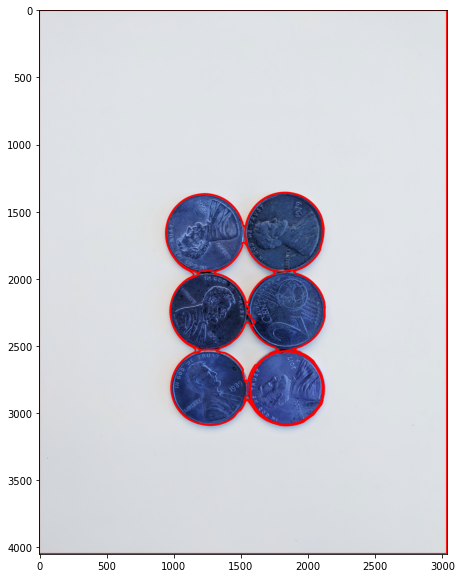

In [57]:
display(sep_coins)

In [58]:
road = cv2.imread('../DATA/road_image.jpg')
road_copy = np.copy(road)

In [59]:
marker_image = np.zeros(road.shape[:2],dtype=np.int32)

In [60]:
segments = np.zeros(road.shape,dtype=np.uint8)

In [61]:
from matplotlib import cm

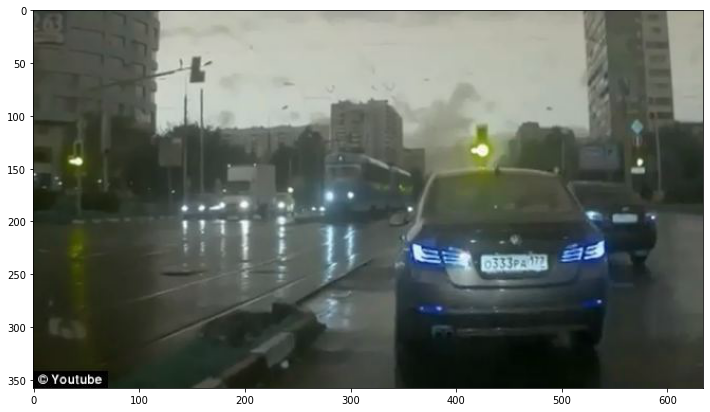

In [62]:
car=cv2.imread('../DATA/car_plate.jpg')
display(car)

In [63]:
license=cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_licence_plate_rus_16stages.xml')

In [84]:
def detect_license(img):
    car_new=car.copy()
    roi=car.copy()
    license_loc=license.detectMultiScale(car_new)
    
    for (x,y,w,h) in license_loc:
        cv2.rectangle(car_new,(x,y),(x+w,y+h),(255,0,0),5)
    license_pic=roi[y:y+h,x:x+w]
    roi_blur=cv2.medianBlur(license_pic,7)
    car_new[y:y+h,x:x+w]=roi_blur
    return car_new

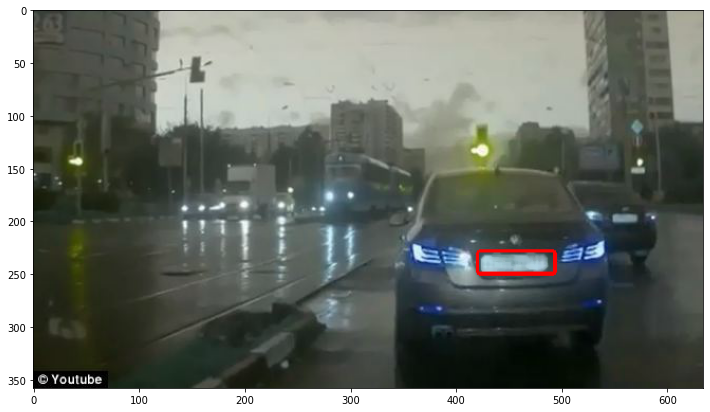

In [85]:
res=detect_license(car)
display(res)

In [82]:
resu=cv2.medianBlur(res[1],7)

In [83]:
res[0][y:y+h,x:x+w]=resu

NameError: name 'y' is not defined

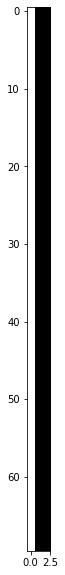

In [79]:
display(res[0])